<a href="https://colab.research.google.com/github/Julibeeert/Data-science-/blob/main/Completa_el_laboratorio_de_Prediccio%CC%81n_con_Aprendizaje_Automa%CC%81tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Space X anuncia los lanzamientos de su cohete Falcon 9 en su sitio web con un costo de 62 millones de dólares; otros proveedores cobran más de 165 millones de dólares por cada lanzamiento. Gran parte de este ahorro se debe a que Space X puede reutilizar la primera etapa del cohete. Por lo tanto, si podemos determinar si la primera etapa aterrizará con éxito, podremos estimar el costo del lanzamiento. Esta información puede ser útil si una empresa competidora quiere presentar una oferta contra Space X para un lanzamiento espacial. En este laboratorio, crearás un flujo de trabajo de aprendizaje automático para predecir si la primera etapa aterrizará, utilizando los datos de los laboratorios anteriores.


Realiza el Análisis Exploratorio de Datos y determina las Etiquetas de Entrenamiento
Crea una columna para la clase
➤ Debes crear una columna nueva que represente la variable objetivo o etiqueta que quieres predecir. En este caso, sería si la primera etapa del cohete aterriza con éxito (1) o no (0).

Estandariza los datos
➤ Normaliza o escala las variables numéricas para que tengan media cero y desviación estándar uno. Esto es importante para algoritmos como SVM y regresión logística.

Divide los datos en conjunto de entrenamiento y de prueba
➤ Separa los datos en dos partes: una para entrenar el modelo y otra para probarlo. Generalmente se usa un 80% para entrenamiento y un 20% para prueba.

Encuentra los mejores hiperparámetros para los siguientes modelos:

SVM (Máquinas de Vectores de Soporte)

Árboles de Clasificación

Regresión Logística

➤ Usa técnicas como GridSearchCV o RandomizedSearchCV para probar diferentes combinaciones de parámetros y encontrar la que da mejores resultados.

Determina qué método funciona mejor usando los datos de prueba
➤ Evalúa todos los modelos con el conjunto de prueba (por ejemplo, usando precisión, exactitud, matriz de confusión, etc.) y decide cuál tiene el mejor rendimiento.

# **Importar librerías y definir funciones auxiliares**

In [10]:
# Solo necesitas esto en Google Colab o Jupyter Notebook normal:
!pip install numpy pandas seaborn matplotlib scikit-learn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [12]:
%matplotlib inline

In [13]:
def plot_confusion_matrix(y_true, y_pred):
    """
    Esta función dibuja la matriz de confusión para dos clases:
    'did not land' (0) y 'landed' (1).
    """
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Calcular matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Crear gráfico
    plt.figure(figsize=(6,6))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

    # Etiquetas y título
    ax.set_xlabel('Etiquetas Predichas')
    ax.set_ylabel('Etiquetas Reales')
    ax.set_title('Matriz de Confusión')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

    plt.show()


Load the dataframe¶
Load the data

In [14]:
import pandas as pd

# Cargar el archivo directamente
data = pd.read_csv('dataset_part_2.csv')

# Verificamos las primeras filas
data.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [15]:
import pandas as pd

# Cargar archivo con la variable objetivo
y_data = pd.read_csv('dataset_part_2.csv')

# Cargar archivo con las variables predictoras
X = pd.read_csv('dataset_part_3.csv')

# Verificar
print("Shape X:", X.shape)
print("Shape y_data:", y_data.shape)

y_data.head()


Shape X: (90, 83)
Shape y_data: (90, 18)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


✅ TASK 1: Crear un array NumPy desde la columna Class
📌 Instrucciones: **texto en negrita**

Usar una sola llave [] para acceder a la columna Class, lo que devuelve una Serie de Pandas.

Aplicar .to_numpy() para convertirla en un array de NumPy.

Guardar ese resultado en la variable Y.

## **TASK 1**
Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).

In [16]:
Y = y_data['Class'].to_numpy()


## **TASK 2**
Standardize the data in X then reassign it to the variable X using the transform provided below.



In [17]:
# students get this
transform = preprocessing.StandardScaler()

## **TASK 3**
Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

X_train, X_test, Y_train, Y_test

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [19]:
print("Cantidad de muestras de prueba:", X_test.shape[0])


Cantidad de muestras de prueba: 18


## TASK 4
Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Diccionario de parámetros corregido
parameters = {
    "C": [0.01, 0.1, 1],
    "penalty": ['l2'],  # 'l2' es correcto, no '12'
    "solver": ['lbfgs']
}




In [21]:
# Crear modelo base
lr = LogisticRegression()

In [22]:
# Aplicar GridSearch
grid_lr = GridSearchCV(lr, parameters, cv=5)
grid_lr.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [23]:
# Mostrar mejores parámetros y puntaje
print("Mejores parámetros:", grid_lr.best_params_)
print("Mejor puntaje de validación:", grid_lr.best_score_)

Mejores parámetros: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor puntaje de validación: 0.8190476190476191


## **TASK 5**
Calculate the accuracy on the test data using the method score:



In [24]:
# Calcular la precisión del mejor modelo en los datos de prueba
test_accuracy = grid_lr.score(X_test, Y_test)

print("Exactitud en los datos de prueba:", test_accuracy)


Exactitud en los datos de prueba: 0.8333333333333334


In [25]:
grid_lr = GridSearchCV(lr, parameters, cv=5)
grid_lr.fit(X_train, Y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

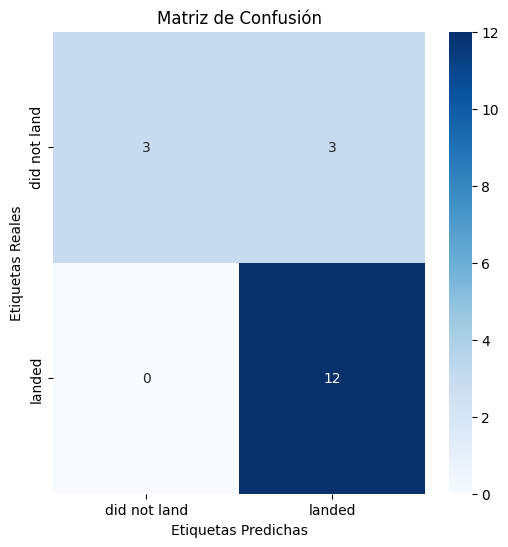

In [26]:
yhat = grid_lr.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


Análisis de la matriz de confusión
Al examinar la matriz de confusión, observamos que la regresión logística puede distinguir entre las distintas clases. Sin embargo, el problema principal son los falsos positivos.

🧾 Resumen:
Verdaderos positivos (True Positive - TP): 12
(La etiqueta real es "aterrizó" y el modelo también predice "aterrizó")

Falsos positivos (False Positive - FP): 3
(La etiqueta real es "no aterrizó", pero el modelo predice que "sí aterrizó")



TASK 6
Create a support vector machine object then create a GridSearchCV object svm_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Parámetros reducidos para ejecución rápida
parameters = {
    'kernel': ['linear', 'rbf'],  # dos tipos de kernel
    'C': [0.1, 1],                # dos valores de C
    'gamma': ['scale']           # valor por defecto (más rápido)
}

# Crear objeto base SVM
svm = SVC()

# GridSearch con solo 5 folds (más rápido)
svm_cv = GridSearchCV(svm, parameters, cv=5)
svm_cv.fit(X_train, Y_train)

# Mostrar resultados
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy on validation set:", svm_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy on validation set: 0.819047619047619


TASK 7
Calculate the accuracy on the test data using the method score:

In [28]:
test_accuracy_svm = svm_cv.score(X_test, Y_test)
print("Exactitud del modelo SVM en los datos de prueba:", test_accuracy_svm)


Exactitud del modelo SVM en los datos de prueba: 0.8333333333333334


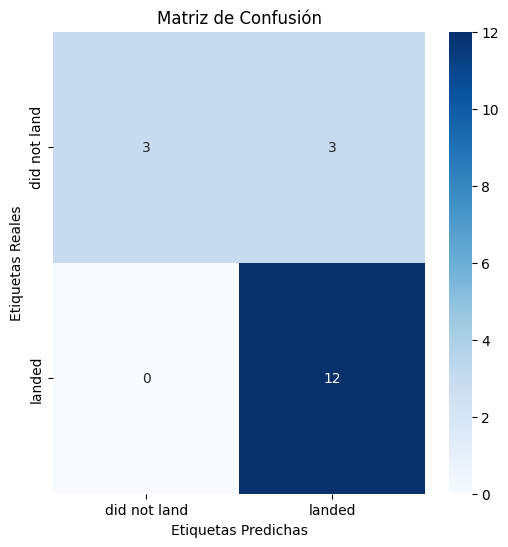

In [29]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

TASK 8
Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Diccionario de hiperparámetros para probar
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, None]
}

# Crear el clasificador base
tree = DecisionTreeClassifier()

# Crear GridSearchCV con validación cruzada de 10 folds
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Ajustar el modelo a los datos de entrenamiento
tree_cv.fit(X_train, Y_train)

# Mostrar los mejores parámetros y la mejor puntuación
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy on validation set:", tree_cv.best_score_)


Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 2}
Accuracy on validation set: 0.8035714285714286


TASK 9
Calculate the accuracy of tree_cv on the test data using the method score:



In [31]:
test_accuracy_tree = tree_cv.score(X_test, Y_test)
print("Exactitud del árbol de decisión en los datos de prueba:", test_accuracy_tree)


Exactitud del árbol de decisión en los datos de prueba: 0.8333333333333334


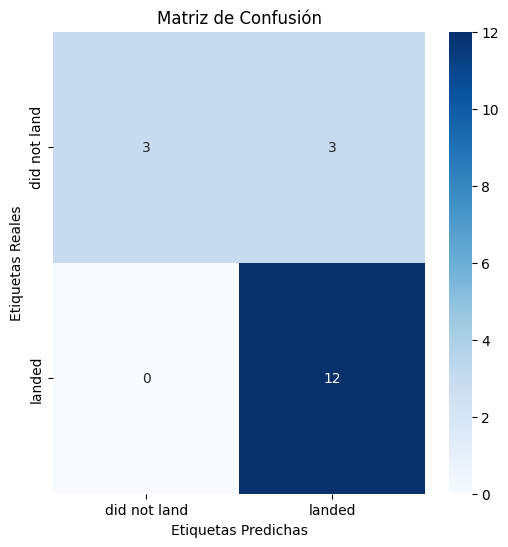

In [32]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

TASK 10
Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a evaluar
parameters = {
    'n_neighbors': list(range(1, 11)),  # probar k desde 1 hasta 10
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Crear el clasificador base
knn = KNeighborsClassifier()

# Crear objeto GridSearchCV con validación cruzada de 10 folds
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Ajustar el modelo
knn_cv.fit(X_train, Y_train)

# Mostrar mejores parámetros y mejor precisión de validación
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy on validation set:", knn_cv.best_score_)


Tuned hyperparameters (best parameters): {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy on validation set: 0.6642857142857143


TASK 11
Calculate the accuracy of knn_cv on the test data using the method score:




In [34]:
test_accuracy_knn = knn_cv.score(X_test, Y_test)
print("Exactitud del modelo KNN en los datos de prueba:", test_accuracy_knn)


Exactitud del modelo KNN en los datos de prueba: 0.6111111111111112


In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

TASK 12
Find the method performs best:

In [35]:
# Comparación de exactitudes en los datos de prueba
acc_logreg = grid_lr.score(X_test, Y_test)
acc_svm = svm_cv.score(X_test, Y_test)
acc_tree = tree_cv.score(X_test, Y_test)
acc_knn = knn_cv.score(X_test, Y_test)

# Imprimir resultados
print("Accuracy - Regresión Logística:", acc_logreg)
print("Accuracy - SVM:", acc_svm)
print("Accuracy - Árbol de decisión:", acc_tree)
print("Accuracy - KNN:", acc_knn)

# Determinar el mejor modelo
accuracies = {
    'Regresión Logística': acc_logreg,
    'SVM': acc_svm,
    'Árbol de Decisión': acc_tree,
    'KNN': acc_knn
}

best_model = max(accuracies, key=accuracies.get)
print("\n✅ El modelo con mejor rendimiento es:", best_model)


Accuracy - Regresión Logística: 0.8333333333333334
Accuracy - SVM: 0.8333333333333334
Accuracy - Árbol de decisión: 0.8333333333333334
Accuracy - KNN: 0.6111111111111112

✅ El modelo con mejor rendimiento es: Regresión Logística
